In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("../Code/data/",one_hot=True)


Extracting ../Code/data/train-images-idx3-ubyte.gz
Extracting ../Code/data/train-labels-idx1-ubyte.gz
Extracting ../Code/data/t10k-images-idx3-ubyte.gz
Extracting ../Code/data/t10k-labels-idx1-ubyte.gz


In [3]:
def load_froozen_graph(graph_file, use_xla=False):
    jit_level = 0
    config = tf.ConfigProto()
    if use_xla:
        jit_level = tf.OptimizerOptions.ON_1
        config.graph_options.optimizer_options.global_jit_level = jit_level

    with tf.Session(graph=tf.Graph(), config=config) as sess:
        gd = tf.GraphDef()
        with tf.gfile.Open(graph_file, 'rb') as f:
            data = f.read()
            gd.ParseFromString(data)
        tf.import_graph_def(gd, name='')
        ops = sess.graph.get_operations()
        n_ops = len(ops)
        print('Number of operation',n_ops) 
        return sess.graph, ops

In [4]:
graph,ops=load_froozen_graph('../Code/weights/frozen_model.pb',use_xla=False)

Number of operation 28


In [5]:
for op in ops:
    print(op.name)#,op.node_def

input_image
Variable
Variable/read
Variable_1
Variable_1/read
Variable_2
Variable_2/read
Variable_3
Variable_3/read
Variable_4
Variable_4/read
Variable_5
Variable_5/read
Variable_6
Variable_6/read
Variable_7
Variable_7/read
MatMul
Add
Relu
MatMul_1
Add_1
Relu_1
MatMul_2
Add_2
Relu_2
MatMul_3
output


In [6]:
def prediction(graph,image):
    """
        Generate test output using the test images and save them
        :param graph: TF graph
        :param w: TF Tensor for the weight
    """
    input_image=graph.get_tensor_by_name('input_image:0')
    output=graph.get_tensor_by_name('output:0')
    y=tf.nn.softmax(output)
    prediction_step=tf.argmax(y,1)
    with tf.Session(graph=graph) as sess:
        
        sess.run(tf.local_variables_initializer())
        prediction=sess.run(prediction_step,feed_dict={input_image:[image]})
    return prediction       


In [11]:
selected_image_number=45
predict=prediction(graph,mnist.test.images[selected_image_number])

In [12]:
predict[0]

9

In [13]:
image=mnist.test.images[selected_image_number].reshape(28,28)

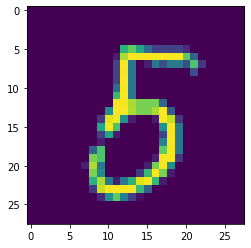

In [14]:
plt.imshow(image)